<a href="https://colab.research.google.com/github/graceetzel/Numerical-Analysis/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

**Part A**

We are interested to implement a Python program to interpolate the function
    \begin{align}
        f(x)=\dfrac{1}{1+12x^2}
    \end{align}
  on the interval $[-1,1]$ using Chebyshev interpolation nodes. To do this, we use code from the lecture notes.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def divided_differences (xp , yp ):
  coef = yp [:] # copy
  n = len ( xp )
  for j in range (1 , n ):
    for i in range (n -1 , j -1 , -1):
      coef [i] = ( coef [ i] - coef [i -1])/( xp [i ] - xp [i - j ])
  return coef

def newton_eval ( coef , xp , x ):
  # coef [k] equals f[x0 ,... , xk]
  res = coef [ -1]
  for k in range (len ( coef ) -2 , -1, -1):
    res = res *( x - xp [k ]) + coef [k]
  return res

def chebyshev_nodes (a , b , n ):
  i = np . arange (1 , n + 1)
  return (a + b) / 2 + ( b - a) / 2 * np . cos ((2 * i - 1) * np . pi / (2 * n ))

n_cheb = 4
x_cheb = chebyshev_nodes (-1 , 1, n_cheb )
x_lin = np.linspace(-1, 1, 200)
y_cheb = [ (1/(1+12*(x**2))) for x in x_cheb]
y_chebt = y_cheb
coef_cheb = divided_differences ( x_cheb , y_cheb )

def chebyshev_eval ( coef , xp , x ):
  res = coef [ -1]
  for k in range (len ( coef ) -2 , -1, -1):
    res = res * (x - xp [k ]) + coef [k ]
  return res


Next, we are interested in plotting the interpolation of the function compared to the function.

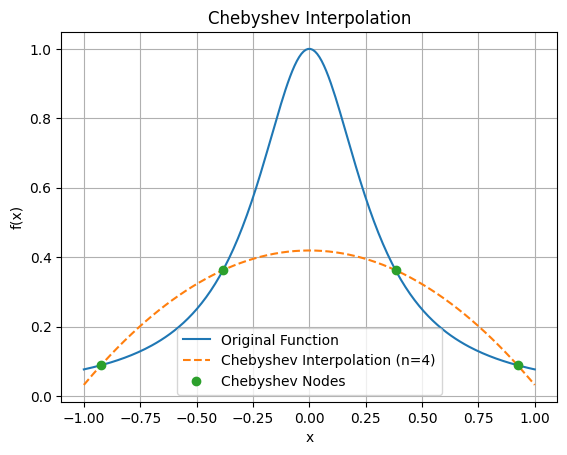

[np.float64(0.07692307692307693), np.float64(0.07836986873378468), np.float64(0.07985666493917133), np.float64(0.08138490594731898), np.float64(0.08295609512896623), np.float64(0.08457180199592954), np.float64(0.0862336655568355), np.float64(0.08794339786054216), np.float64(0.08970278773821039), np.float64(0.09151370475558832), np.float64(0.09337810338770035), np.float64(0.09529802742877495), np.float64(0.09727561465090973), np.float64(0.09931310172564696), np.float64(0.10141282942331872), np.float64(0.1035772481057089), np.float64(0.10580892352826443), np.float64(0.10811054296876066), np.float64(0.11048492169997405), np.float64(0.11293500982452737), np.float64(0.11546389949063046), np.float64(0.11807483250792364), np.float64(0.12077120838301807), np.float64(0.12355659279458611), np.float64(0.12643472652795382), np.float64(0.12940953488904067), np.float64(0.13248513761713432), np.float64(0.13566585931531586), np.float64(0.13895624041629678), np.float64(0.14236104869990973), np.float64(

In [ ]:
import matplotlib.pyplot as plt

#Points for plotting
x_plot = x_lin
y_plot_original = [ (1/(1+12*(x**2))) for x in x_plot ]

# Evaluate based on lecture code
y_plot_interpolated = [ chebyshev_eval(coef_cheb, x_cheb, x) for x in x_plot ]

# Plot function and the interpolated polynomial
plt.plot(x_plot, y_plot_original, label='Original Function')
plt.plot(x_plot, y_plot_interpolated, label=f'Chebyshev Interpolation (n={n_cheb})', linestyle='--')
plt.plot(x_cheb, y_cheb, 'o', label='Chebyshev Nodes')
plt.title('Chebyshev Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print(y_plot_original)

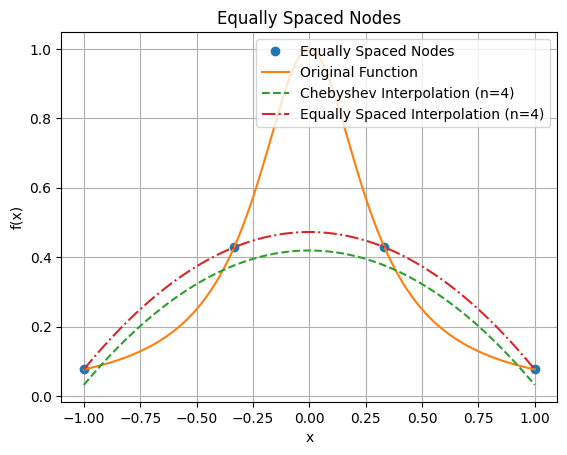

In [ ]:
# Implement interpolation using equally spaced nodes
n_equal = n_cheb
x_equal = np.linspace(-1, 1, n_equal)
y_equal = [ (1/(1+12*(x**2))) for x in x_equal ]
coef_equal = divided_differences(x_equal, y_equal)
y_plot_equal_interpolated = [ newton_eval(coef_equal, x_equal, x) for x in x_plot ]

#Plot the equally spaced nodes
plt.plot(x_equal, y_equal, 'o', label='Equally Spaced Nodes')
plt.plot(x_plot, y_plot_original, label='Original Function')
plt.plot(x_plot, y_plot_interpolated, label=f'Chebyshev Interpolation (n={n_cheb})', linestyle='--')
plt.plot(x_plot, y_plot_equal_interpolated, label=f'Equally Spaced Interpolation (n={n_equal})', linestyle='-.')
plt.title('Equally Spaced Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

**Part b**

Maximum value of the product term for Chebyshev nodes (n=4): 0.12500000000000006
Maximum value of the product term for equally spaced nodes (n=4): 0.1975052443971312


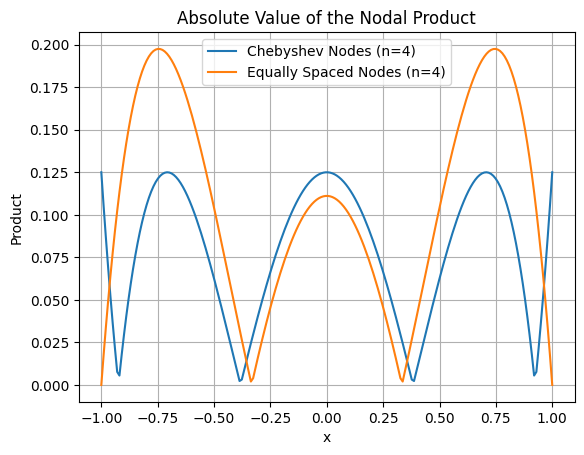

In [ ]:
def product_term_values(x_nodes, x_values):
  product_values = []
  for x in x_values:
    product = 1
    for xi in x_nodes:
      product *= (x - xi)
    product_values.append(abs(product))
  return product_values

# Chebyshev nodes from Part A
cheb_product_values = product_term_values(x_cheb, x_lin)
max_cheb_product = max(cheb_product_values)
print(f"Maximum value of the product term for Chebyshev nodes (n={n_cheb}): {max_cheb_product}")

# equally spaced nodes from Part A
equal_product_values = product_term_values(x_equal, x_lin)
max_equal_product = max(equal_product_values)
print(f"Maximum value of the product term for equally spaced nodes (n={n_equal}): {max_equal_product}")


# Trazar cada caso
plt.plot(x_lin, cheb_product_values, label=f'Chebyshev Nodes (n={n_cheb})')
plt.plot(x_lin, equal_product_values, label=f'Equally Spaced Nodes (n={n_equal})')
plt.title('Absolute Value of the Nodal Product')
plt.xlabel('x')
plt.ylabel(r'Product')
plt.legend()
plt.grid(True)
plt.show()

# Problem 2

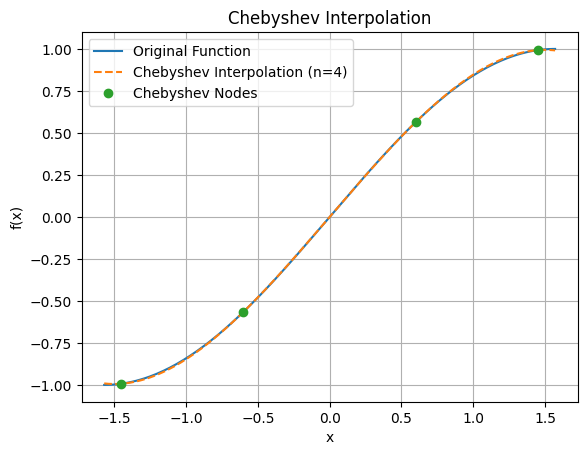

[-1.0, -0.9998753895176573, -0.9995015891261738, -0.9988786919844436, -0.9980068533314933, -0.9968862904477932, -0.995517282601106, -0.9939001709768878, -0.9920353585932578, -0.9899233102005571, -0.9875645521655237, -0.9849596723401105, -0.9821093199149804, -0.9790142052577144, -0.9756750997357736, -0.972092835524257, -0.9682683053985072, -0.9642024625116117, -0.959896320156857, -0.9553509515151948, -0.9505674893877828, -0.9455471259136671, -0.9402911122726756, -0.9348007583735983, -0.9290774325277306, -0.9231225611078607, -0.9169376281927887, -0.9105241751974622, -0.9038838004888236, -0.8970181589874635, -0.8899289617551802, -0.8826179755685469, -0.8750870224785936, -0.8673379793567146, -0.859372777426912, -0.8511934017844945, -0.8428018909013506, -0.8342003361179174, -0.8253908811219762, -0.8163757214143991, -0.8071571037619854, -0.7977373256375193, -0.7881187346471923, -0.7783037279455299, -0.7682947516379707, -0.7580943001712455, -0.747704915711709, -0.7371291875117789, -0.72636975

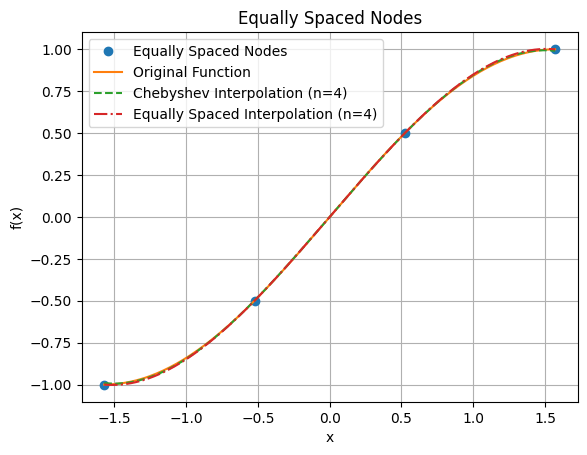

In [ ]:
#For f(x)=sin(x) on the interval [-pi/2,pi/2]

n_cheb = 4
x_cheb = chebyshev_nodes (-math.pi/2, math.pi/2, n_cheb )
x_lin = np.linspace(-math.pi/2, math.pi/2, 200)
# Corrected y_cheb to use sin(x)
y_cheb = [ math.sin(x) for x in x_cheb]
y_chebt = y_cheb
coef_cheb = divided_differences ( x_cheb , y_cheb )

def chebyshev_eval ( coef , xp , x ):
  # Corrected indexing and range to use integers
  res = coef [ -1]
  for k in range (len ( coef ) -2 , -1, -1):
    res = res * (x - xp [k ]) + coef [k ]
  return res

#Points for plotting
x_plot = x_lin
# Corrected y_plot_original to use sin(x)
y_plot_original = [ math.sin(x) for x in x_plot ]

# Evaluate based on lecture code
y_plot_interpolated = [ chebyshev_eval(coef_cheb, x_cheb, x) for x in x_plot ]

# Plot function and the interpolated polynomial
plt.plot(x_plot, y_plot_original, label='Original Function')
plt.plot(x_plot, y_plot_interpolated, label=f'Chebyshev Interpolation (n={n_cheb})', linestyle='--')
plt.plot(x_cheb, y_cheb, 'o', label='Chebyshev Nodes')
plt.title('Chebyshev Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print(y_plot_original)

###################### Equally spaced nodes ###########################

# Implement interpolation using equally spaced nodes
n_equal = n_cheb
x_equal = np.linspace(-math.pi/2, math.pi/2, n_equal)
y_equal = [ math.sin(x) for x in x_equal ]
coef_equal = divided_differences(x_equal, y_equal)
y_plot_equal_interpolated = [ newton_eval(coef_equal, x_equal, x) for x in x_plot ]

#Plot the equally spaced nodes
plt.plot(x_equal, y_equal, 'o', label='Equally Spaced Nodes')
plt.plot(x_plot, y_plot_original, label='Original Function')
plt.plot(x_plot, y_plot_interpolated, label=f'Chebyshev Interpolation (n={n_cheb})', linestyle='--')
plt.plot(x_plot, y_plot_equal_interpolated, label=f'Equally Spaced Interpolation (n={n_equal})', linestyle='-.')
plt.title('Equally Spaced Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


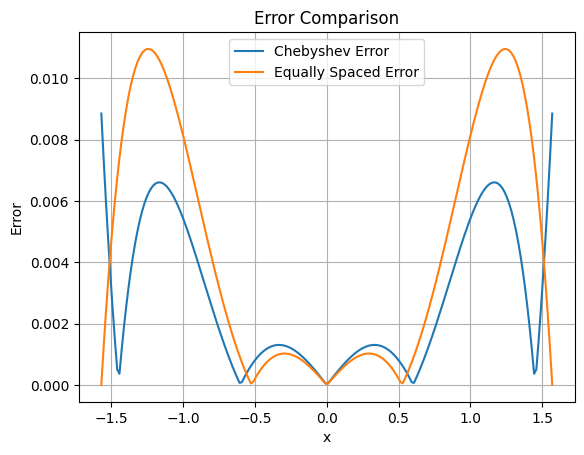

In [ ]:
#Plotting the errors between for both

# Convert lists to numpy arrays for element-wise operations
error = abs(np.array(y_plot_original) - np.array(y_plot_interpolated))
error_equal = abs(np.array(y_plot_original) - np.array(y_plot_equal_interpolated))

plt.plot(x_plot, error, label='Chebyshev Error')
plt.plot(x_plot, error_equal, label='Equally Spaced Error')
plt.title('Error Comparison')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

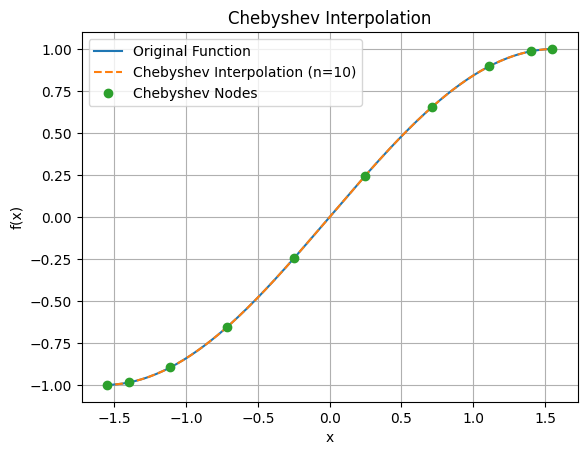

[-1.0, -0.9998753895176573, -0.9995015891261738, -0.9988786919844436, -0.9980068533314933, -0.9968862904477932, -0.995517282601106, -0.9939001709768878, -0.9920353585932578, -0.9899233102005571, -0.9875645521655237, -0.9849596723401105, -0.9821093199149804, -0.9790142052577144, -0.9756750997357736, -0.972092835524257, -0.9682683053985072, -0.9642024625116117, -0.959896320156857, -0.9553509515151948, -0.9505674893877828, -0.9455471259136671, -0.9402911122726756, -0.9348007583735983, -0.9290774325277306, -0.9231225611078607, -0.9169376281927887, -0.9105241751974622, -0.9038838004888236, -0.8970181589874635, -0.8899289617551802, -0.8826179755685469, -0.8750870224785936, -0.8673379793567146, -0.859372777426912, -0.8511934017844945, -0.8428018909013506, -0.8342003361179174, -0.8253908811219762, -0.8163757214143991, -0.8071571037619854, -0.7977373256375193, -0.7881187346471923, -0.7783037279455299, -0.7682947516379707, -0.7580943001712455, -0.747704915711709, -0.7371291875117789, -0.72636975

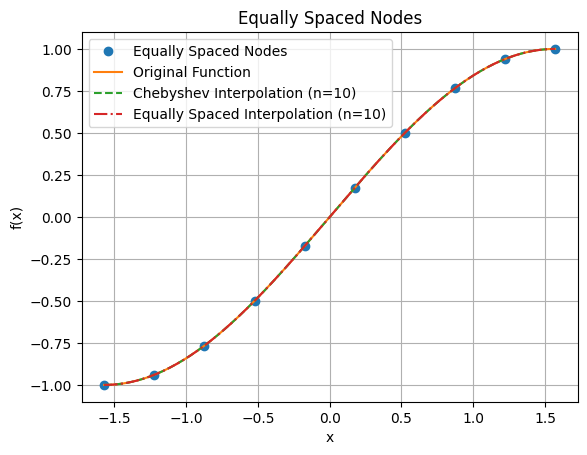

In [ ]:
#10 Nodes

n_cheb_10=10
x_cheb_10 = chebyshev_nodes (-math.pi/2, math.pi/2, n_cheb_10 )
x_lin = np.linspace(-math.pi/2, math.pi/2, 200)
# Corrected y_cheb to use sin(x)
y_cheb_10 = [ math.sin(x) for x in x_cheb_10]
y_chebt_10 = y_cheb_10
coef_cheb_10 = divided_differences ( x_cheb_10 , y_cheb_10 )

def chebyshev_eval ( coef , xp , x ):
  # Corrected indexing and range to use integers
  res = coef [ -1]
  for k in range (len ( coef ) -2 , -1, -1):
    res = res * (x - xp [k ]) + coef [k ]
  return res

#Points for plotting
x_plot = x_lin
# Corrected y_plot_original to use sin(x)
y_plot_original = [ math.sin(x) for x in x_plot ]

# Evaluate based on lecture code
y_plot_interpolated_10 = [ chebyshev_eval(coef_cheb_10, x_cheb_10, x) for x in x_plot ]

# Plot function and the interpolated polynomial
plt.plot(x_plot, y_plot_original, label='Original Function')
plt.plot(x_plot, y_plot_interpolated_10, label=f'Chebyshev Interpolation (n={n_cheb_10})', linestyle='--')
plt.plot(x_cheb_10, y_cheb_10, 'o', label='Chebyshev Nodes')
plt.title('Chebyshev Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
print(y_plot_original)

###################### Equally spaced nodes ###########################

# Implement interpolation using equally spaced nodes
n_equal_10 = n_cheb_10
x_equal_10 = np.linspace(-math.pi/2, math.pi/2, n_equal_10)
y_equal_10 = [ math.sin(x) for x in x_equal_10 ]
coef_equal_10 = divided_differences(x_equal_10, y_equal_10)
y_plot_equal_interpolated_10 = [ newton_eval(coef_equal_10, x_equal_10, x) for x in x_plot ]

#Plot the equally spaced nodes
plt.plot(x_equal_10, y_equal_10, 'o', label='Equally Spaced Nodes')
plt.plot(x_plot, y_plot_original, label='Original Function')
plt.plot(x_plot, y_plot_interpolated_10, label=f'Chebyshev Interpolation (n={n_cheb_10})', linestyle='--')
plt.plot(x_plot, y_plot_equal_interpolated_10, label=f'Equally Spaced Interpolation (n={n_equal_10})', linestyle='-.')
plt.title('Equally Spaced Nodes')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

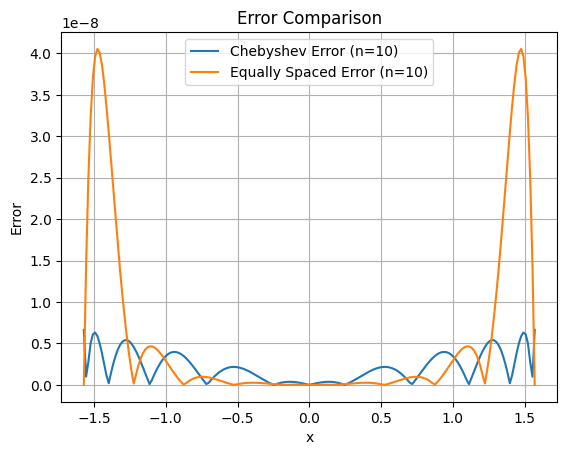

In [ ]:
#Plotting the errors between for both

# Convert lists to numpy arrays for element-wise operations
error_10 = abs(np.array(y_plot_original) - np.array(y_plot_interpolated_10))
error_equal_10 = abs(np.array(y_plot_original) - np.array(y_plot_equal_interpolated_10))

plt.plot(x_plot, error_10, label='Chebyshev Error (n=10)')
plt.plot(x_plot, error_equal_10, label='Equally Spaced Error (n=10)')
plt.title('Error Comparison')
plt.xlabel('x')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import math

#Took from your solution

#interval
a, b = 0, math.pi/2
tol = 1e-10

def f(x):
  return np.sin(x)

#theoretical error bound for Chebychev interpolation: polynomial of degree n through (n+1) points
def theoretical_error_bound(a, b, n):
  return ((b - a)**(n+1)) / (2**(2*n+1) * math.factorial(n+1))

#find minimal n
n=1
while True:
  bound = theoretical_error_bound(a, b, n)
  numerator = math.pi/4 * ((math.pi/8)**n)
  denominator = math.factorial(n+1)
  error_bound = numerator / denominator
  print(f"n = {n}, numerator = {numerator}, denominator = {denominator}, error bound = {error_bound}")
  if bound < tol:
    break
  n += 1

print(f"Theoretical smallest n ≈ {n} (bound = {bound:.3e})")

#Numerical verification
x_plot = np.linspace(a, b, 400)
error_met = False

print("Numerical verification of error bound on a dense grid")
for k in range(2, n+5):
  x_cheb = chebyshev_nodes(a, b, k) #k points --> interpolating polynomial of k-1 degree
  y_cheb = f(x_cheb)
  coef_cheb = divided_differences(x_cheb, y_cheb)
  y_interp = np.array([newton_eval(coef_cheb, x_cheb, xi) for xi in x_plot])
  error = np.max(np.abs(f(x_plot) - y_interp))
  print(f"n={k:2d}, max|f - p_n| = {error:.3e}")
  if not error_met and error < tol:
    print(f"Verified numerically: Condition met for degree n = {k-1}")
    error_met = True
    break

n = 1, numerator = 0.30842513753404244, denominator = 2, error bound = 0.15421256876702122
n = 2, numerator = 0.12111826828242116, denominator = 6, error bound = 0.020186378047070193
n = 3, numerator = 0.04756303273144649, denominator = 24, error bound = 0.0019817930304769373
n = 4, numerator = 0.018677959276445395, denominator = 120, error bound = 0.00015564966063704496
n = 5, numerator = 0.007334817455866274, denominator = 720, error bound = 1.0187246466480936e-05
n = 6, numerator = 0.002880376079346458, denominator = 5040, error bound = 5.715031903465194e-07
n = 7, numerator = 0.0011311210413063255, denominator = 40320, error bound = 2.8053597254621166e-08
n = 8, numerator = 0.00044419019421109855, denominator = 362880, error bound = 1.2240690978039532e-09
n = 9, numerator = 0.00017443308136627634, denominator = 3628800, error bound = 4.806908106433982e-11
Theoretical smallest n ≈ 9 (bound = 4.807e-11)
Numerical verification of error bound on a dense grid
n= 2, max|f - p_n| = 1.281e

Explanation of the code, since I directly copied it from you:

In the beginning, the interval function defines the range of values that the optimization of the degree of interpolation occurs. Next, you define the function $sin(x)$, which will be used to represent the "original function." Then, you define a bound based on the theorem given to us in the homework. This theoretical bound will be used to simulate values of $n$ until the threshold is met (which is based on the theoretical bound).

The error bound represents the theoretical bound, but with the substitions for the interval. Next, you create numerical verification, which will be used in the code below to more clearly show the contionts for the bound using the method of chebyshev's nodes. Therefore, we can compare $f$ using the original function defined and chebyshev to represent $p_n$.

